# Neuronalen Netze zum Lösen eines Regressionsproblems

Zunächst werden relevante Pakete geladen.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers

Anschließend generieren wir einen nichtlinearen Datensatz mit einer Prädiktorvariable $x$ und einer Zielvariable $x$.

In [167]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate one feature
n_samples = 2000
X = np.random.rand(n_samples) * 10  # Feature: Random values between 0 and 10
y = np.cos(X) + 3 * np.sin(0.6 * X - 2) + 3 * np.cos(2 * X - 2)  + np.random.randn(n_samples) * 0.5  

# Reshape X for model input
X = X.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

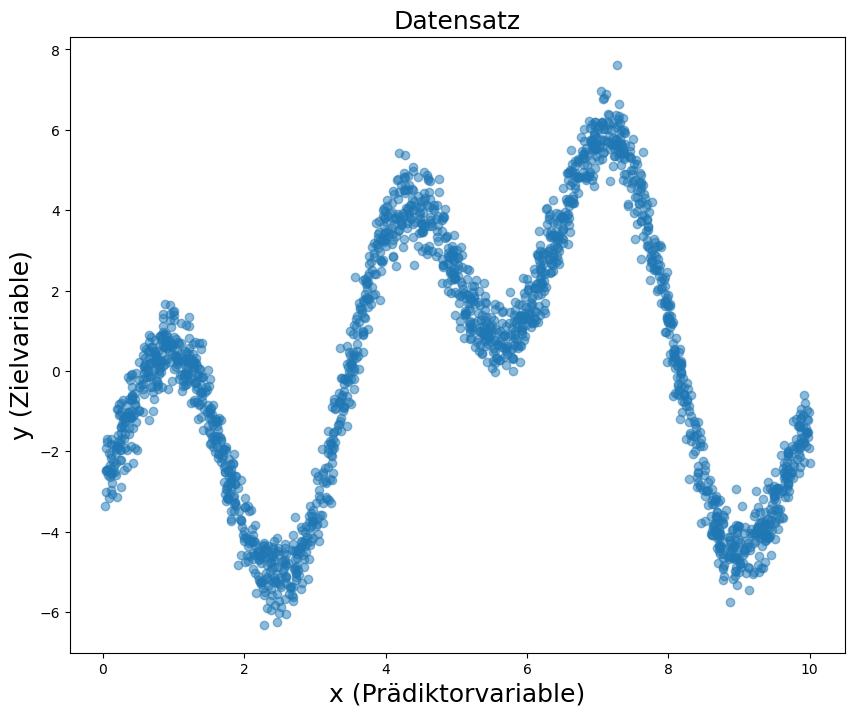

In [168]:
# Plotten des Datensatzes
plt.figure(figsize=(10, 8))
plt.scatter(X, y, alpha=0.5)
plt.title('Datensatz', fontsize = 18) 
plt.xlabel('x (Prädiktorvariable)', fontsize = 18) 
plt.ylabel('y (Zielvariable)', fontsize = 18) 
plt.show()

In [187]:
# Scale the data (optional but recommended for neural networks)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,)),  # Versteckte Schicht mit 10 Neuronen und Aktivierungsfunktion ReLU
    layers.Dense(10, activation='relu'),                    # Versteckte Schicht mit 10 Neuronen und Aktivierungsfunktion ReLU
    layers.Dense(1)                                         # Ausgabeschicht mit 1 Neuron und ohne Aktivierungsfunktion
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=500, validation_split=0.0, verbose=0)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f"Testfehler (MSE): {loss}")
print(f"Trainingsfehler (MSE): {history.history['loss'][-1]}")

13/13 [==============================] - 0s 329us/step - loss: 0.2779
Testfehler (MSE): 0.27786341309547424
Trainingsfehler (MSE): 0.2768930196762085


Plotten der tatsächlichen Testdaten und der vorhergesagten Werte.

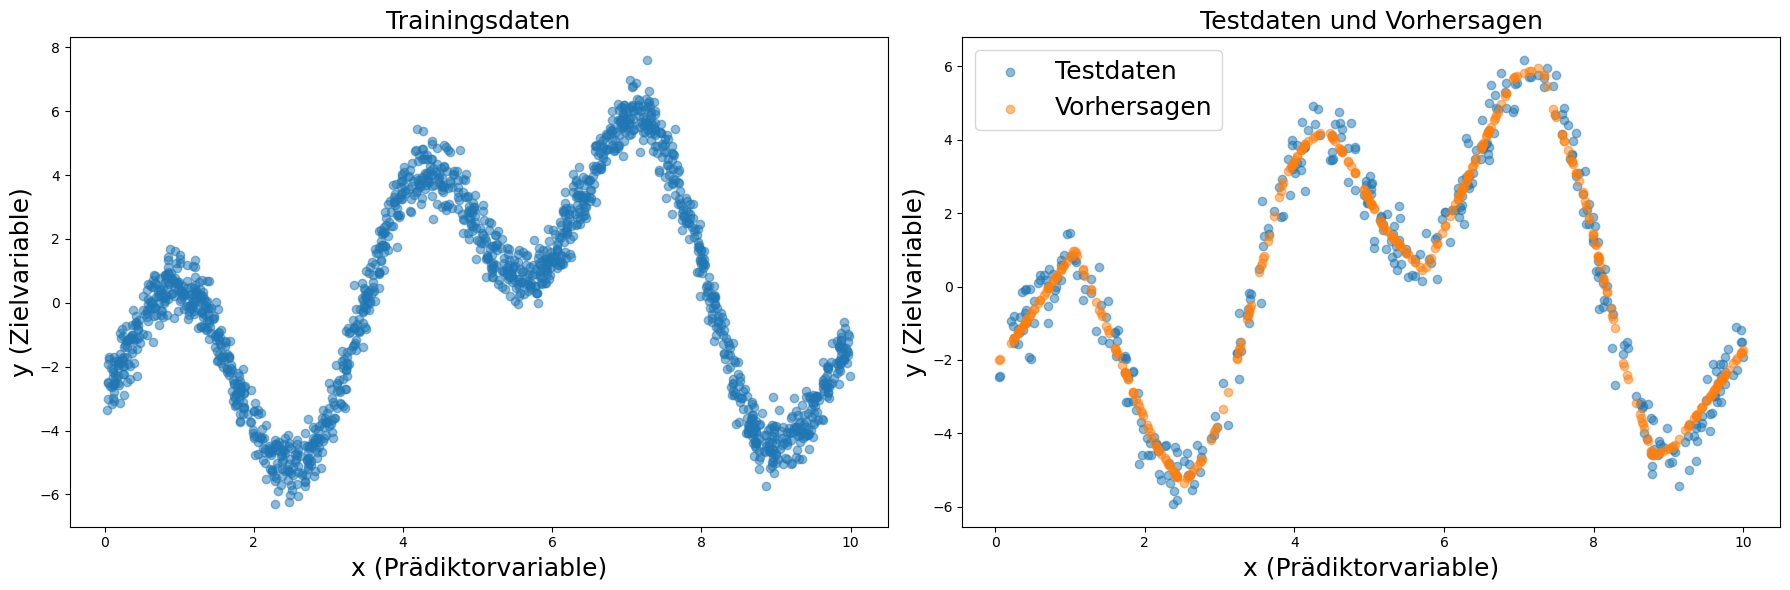

In [197]:
# Plotten der tatsächlichen und der vorhergesagte Werte 
plt.figure(figsize=(18, 6))

# Plotten des Datensatzes
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.5)
plt.title('Trainingsdaten', fontsize = 18) 
plt.xlabel('x (Prädiktorvariable)', fontsize = 18) 
plt.ylabel('y (Zielvariable)', fontsize = 18) 

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Testdaten', alpha=0.5)
plt.scatter(X_test, y_pred, label='Vorhersagen', alpha=0.5)
plt.title('Testdaten und Vorhersagen', fontsize = 18) 
plt.xlabel('x (Prädiktorvariable)', fontsize = 18) 
plt.ylabel('y (Zielvariable)', fontsize = 18) 
plt.legend(fontsize=18)


plt.savefig('data_and_predictions_reg.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
